# Face Reconstruction Based on Depth Estimation
Fang Lingxiao (Student ID: 5614279)

In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import open3d as o3d
import depth_estimation
importlib.reload(depth_estimation)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


<module 'depth_estimation' from '/home/s5614279/MasterClass/Face Reconstruction/depth_estimation.py'>

## 1. Introduction
3D face reconstruction from a single image is an important mission of computer vision. It has been broadly exploited in many different applications, from medical surgery to virtual character generation. Over the past decade, the computer graphics and vision community has made rapid progress in algorithms and methods, especially in the era of deep learning, and many of them have yielded excellent results.However, most of those methods use 3D datasets in the training, which consumes a lot of computing power. Moreover, unlike images which can be internet-scale, the the amount of 3D data is limited. 

In this project, monocular depth estimation is used to reconstruct 3D faces. Monocular depth estimation is an essential technology in the fields of face recognition, augmented reality, and 3D reconstruction. It reduces the dimensionality of the three-dimensional world and projects it into a two-dimensional image, which requires a large amount of prior knowledge to understand the scene. Because of the emergence of deep learning, more and more data can be used for training, and solving problems such as geometric ill-posedness (Ke et al. 2023).
 
The idea of this project is the following: First, an affine-invariant monocular depth estimation method based on the diffusion model called Marigold was used to generate depth maps. It is obtained through fine-tuning based on the pre-trained Stable Diffusion. Then, as the estimated depth maps contain depth information, they can be utilized to generate point clouds by obtaining spatial information for each pixel point. 


## 2. Face Reconstruction Based on Depth Estimation
This section describes the steps and methods of 3D reconstruction, and the overview diagram is shown in Figure below.

![diagram](doc/figure1.jpg)

### 2.1 Monocular Depth Estimation

In [2]:
checkpoint_path = "prs-eth/marigold-lcm-v1-0"
input_rgb_dir = "input"
output_dir = "output"

input_images, output_depths = depth_estimation.run_marigold(checkpoint_path, input_rgb_dir, output_dir)

INFO:root:Inference settings: checkpoint = `prs-eth/marigold-lcm-v1-0`, with denoise_steps = 4, ensemble_size = 5, processing resolution = 768, seed = None; color_map = Spectral.
INFO:root:output dir = output
INFO:root:device = cuda
INFO:root:Found 8 images
/home/s5614279/.pyenv/versions/anaconda3-2022.05/envs/depth2mesh/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The config attributes {'default_denoising_steps': 1, 'default_processing_resolution': 768} were passed to MarigoldPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'default_denoising_steps': 1, 'default_processing_resolution': 768} are not expected by MarigoldPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Estimating depth:   0%|          | 0/8 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

/home/s5614279/.pyenv/versions/anaconda3-2022.05/envs/depth2mesh/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

  Inference batches:   0%|          | 0/3 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

    Diffusion denoising:   0%|          | 0/4 [00:00<?, ?it/s]

#### We can see those depth estimation outputs

Input Image:


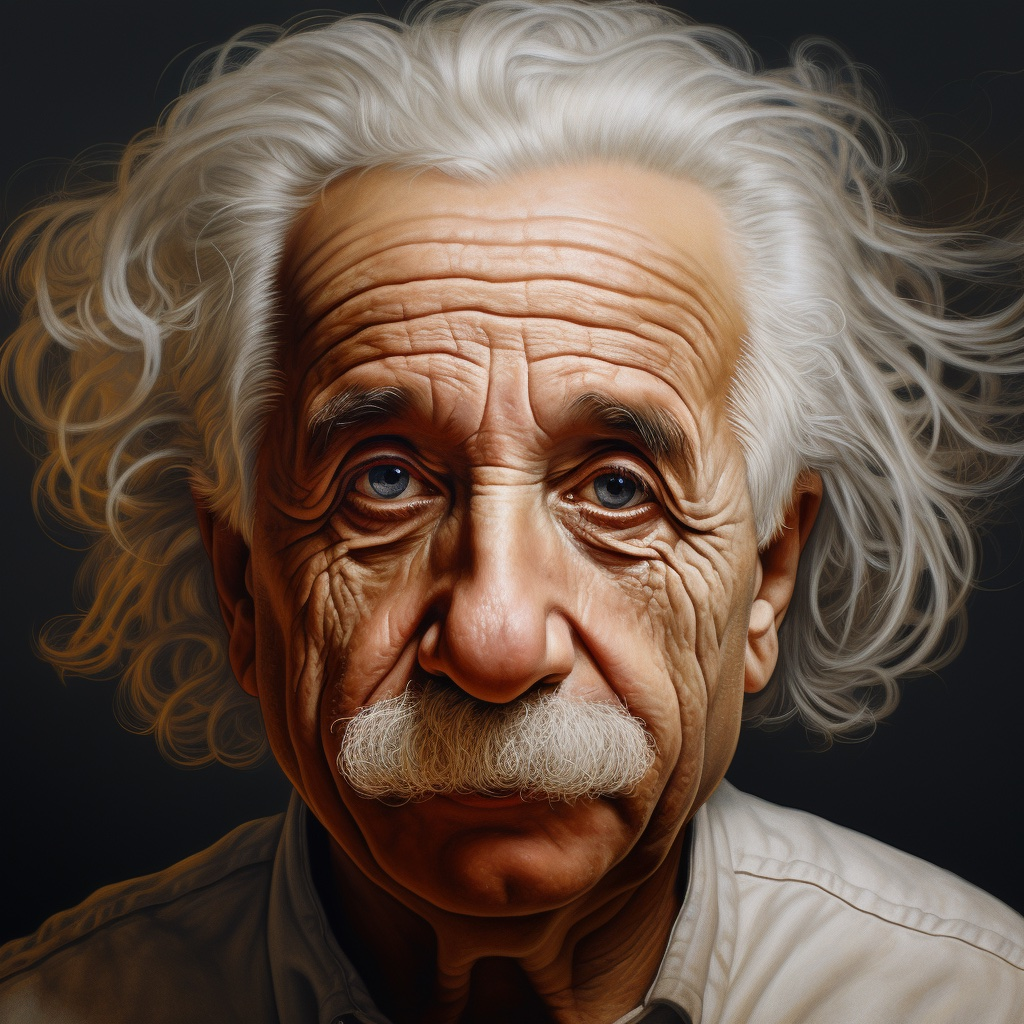

Output Depth:


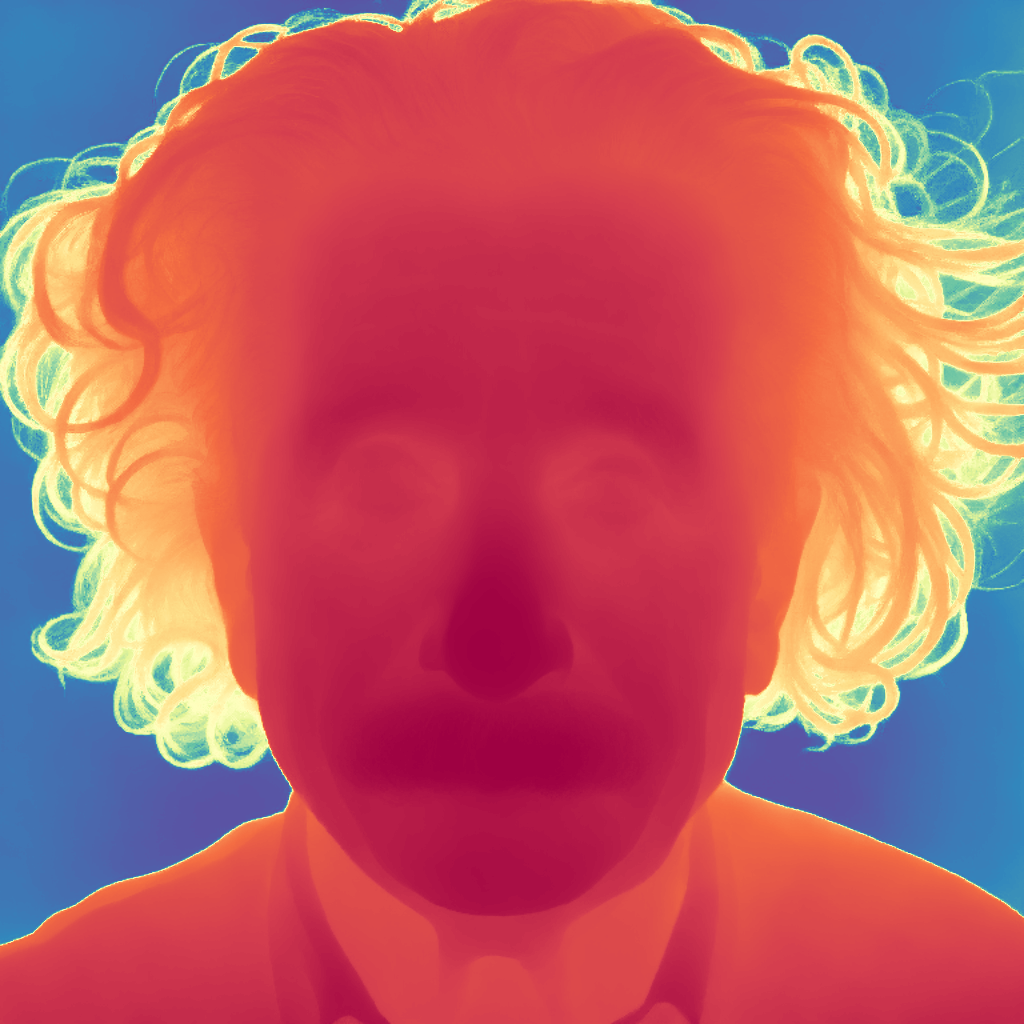

In [3]:
first_input_image = input_images[0]
first_output_depth = output_depths[0]

print("Input Image:")
display(first_input_image)
print("Output Depth:")
display(first_output_depth)

### 2.2 Depth Map To Point Cloud


In [4]:
import depth2pc
importlib.reload(depth2pc)

<module 'depth2pc' from '/home/s5614279/MasterClass/Face Reconstruction/depth2pc.py'>

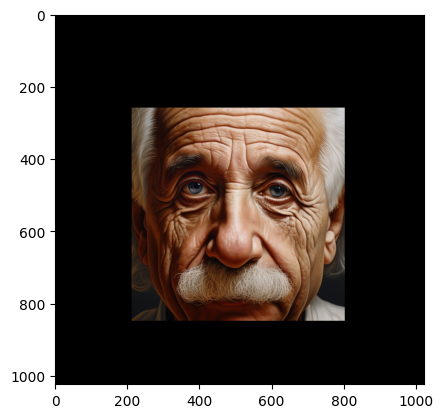

In [5]:
depth_img = cv2.imread('output/depth_colored/einstein_pred_colored.png', cv2.IMREAD_UNCHANGED)
color_img = cv2.imread('/home/s5614279/MasterClass/Face Reconstruction/input/einstein.jpg')

# face recognition and segmentation
depth_seg_img, color_seg_img = depth2pc.face_segmentation(depth_img, color_img)
depth_seg_img = np.array(depth_seg_img)
color_seg_img = np.array(color_seg_img)
color_seg_img = cv2.cvtColor(color_seg_img, cv2.COLOR_BGR2RGB)

plt.imshow(color_seg_img)

In [6]:
pointcloud_color = depth2pc.depth_to_pointcloud_colour(depth_img, color_img, depth_scale=0.5, depth_trunc=1, fx=700, fy=700, cx=None, cy=None)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pointcloud_color[:, :3])
pcd.colors = o3d.utility.Vector3dVector(pointcloud_color[:, 3:] / 255.0)
o3d.visualization.draw_geometries([pcd])

![pointcloud](doc/Einstein_pointcloud.jpg)

As we can see, this point cloud consists of hair and background, and there are noise. We can use 3D tools to clean it. Here is the final obj file of the image.

 ![obj](doc/Einstein_obj.jpg)


### 2.4 Object Reconstruction
This system can reconstruct not only faces, but any images. Here is a reconstruction of a cat.

In [7]:
cat_depth_img = cv2.imread('output/depth_colored/example_5_pred_colored.png', cv2.IMREAD_UNCHANGED)
cat_color_img = cv2.imread('input/example_5.jpg')


cat_pointcloud_color = depth2pc.depth_to_pointcloud_colour(cat_depth_img, cat_color_img, depth_scale=0.5, depth_trunc=1, fx=500, fy=500, cx=None, cy=None)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(cat_pointcloud_color[:, :3])
pcd.colors = o3d.utility.Vector3dVector(cat_pointcloud_color[:, 3:] / 255.0)
o3d.visualization.draw_geometries([pcd])

![cat point cloud](doc/cat_pointcloud.jpg)

## 3. Conclusion
In this work, we have implemented a Diffusion solution for depth estimation of 2D images for 3D reconstruction. 3D face reconstruction based on depth estimation is an ill-posed problem but we are still try different ways to solve it. The results confirm the importance of a detailed visual scene understanding prior for depth estimation, thus give researchers a new perspective to do 3D reconstructions not only with face, but any objects. So far the results are not perfect, and future research directions can be using depth estimation map as datasets during the training of 3D reconstruction task.